In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df['Class'].value_counts()

,count
Class,
0.0,23769
1.0,88


In [4]:
df['Amount'].skew()

np.float64(13.168587670406032)

In [5]:
df['Amount']=np.log1p(df['Amount'])

In [6]:
df['Amount'].skew()

np.float64(0.18997519567910098)

In [7]:
df.drop('Time',axis=1,inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
x=df.drop('Class',axis=1)
y=df['Class']

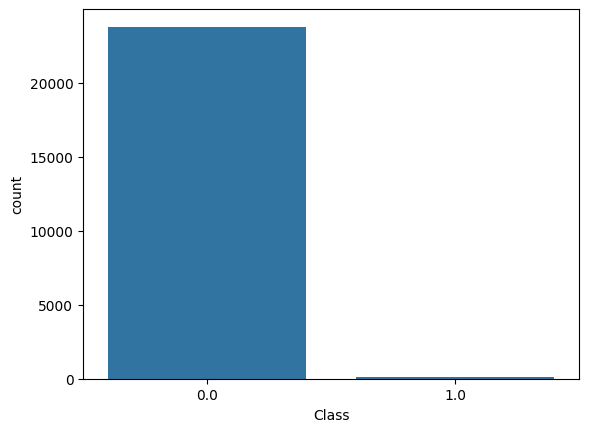

In [10]:
sns.barplot(x=y.value_counts().index,y=y.value_counts())
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=66)

In [12]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek(random_state=66)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

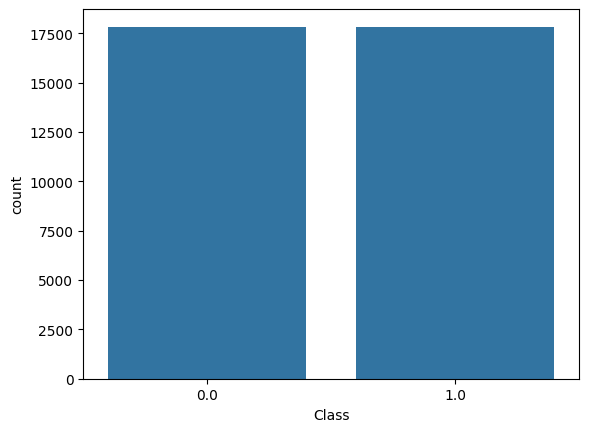

In [13]:
sns.barplot(x=y_train_sm.value_counts().index,y=y_train_sm.value_counts())
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train_sm)
x_test=sc.transform(x_test)

In [16]:
param_grid={
    'max_depth':[4,6,8],
    'n_estimators':[100,200,300],
    'class_weight':['balanced'],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[2,3,4]
}

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rff=RandomForestClassifier(random_state=66)
rf=GridSearchCV(rff,param_grid=param_grid,cv=5,n_jobs=-1,verbose=3)
rf.fit(x_train,y_train_sm)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=66), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [4, 6, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score,roc_auc_score,precision_score
y_preda=rf.predict_proba(x_test)[:,1]
y_pred=(y_preda>0.5).astype(int)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("ROC AUC Score:",roc_auc_score(y_test,y_preda))
print("Precision Score:",precision_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5943
         1.0       0.74      0.91      0.82        22

    accuracy                           1.00      5965
   macro avg       0.87      0.95      0.91      5965
weighted avg       1.00      1.00      1.00      5965

[[5936    7]
 [   2   20]]
Recall Score: 0.9090909090909091
F1 Score: 0.8163265306122449
ROC AUC Score: 0.99914337723525
Precision Score: 0.7407407407407407
